In [60]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [61]:
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.pipeline import Pipeline 
from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.decomposition import PCA 
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score,confusion_matrix,accuracy_score

In [62]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')
# data.head(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [63]:
mis_data = data.isna().sum()
mis_data.sort_values(ascending=False)
mis_data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [64]:
data.duplicated().sum()
data.drop_duplicates(keep='first', subset=None, inplace=True)
data.duplicated().sum()

0

In [65]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [66]:
data.corr()['chol'].sort_values(ascending=False)

chol        1.000000
age         0.207216
trestbps    0.125256
thal        0.096810
ca          0.086878
exang       0.064099
oldpeak     0.050086
fbs         0.011428
slope       0.000417
thalach    -0.005308
cp         -0.072682
target     -0.081437
restecg    -0.147602
sex        -0.195571
Name: chol, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

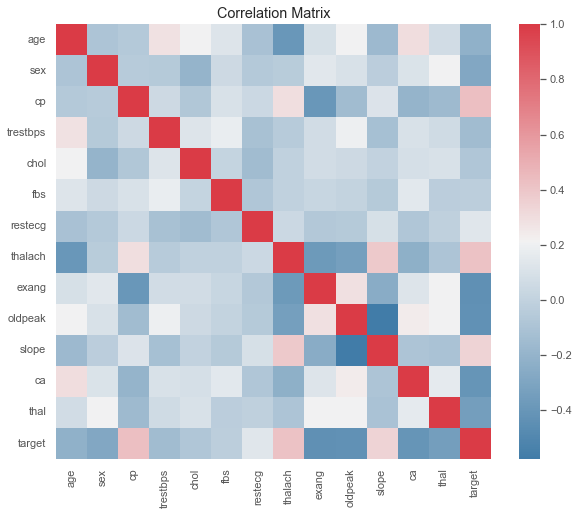

In [67]:
data_corr = data.corr()
f,ax = plt.subplots(figsize=(10,8))

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=bool), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)
ax.set_title('Correlation Matrix')

<AxesSubplot:ylabel='Count'>

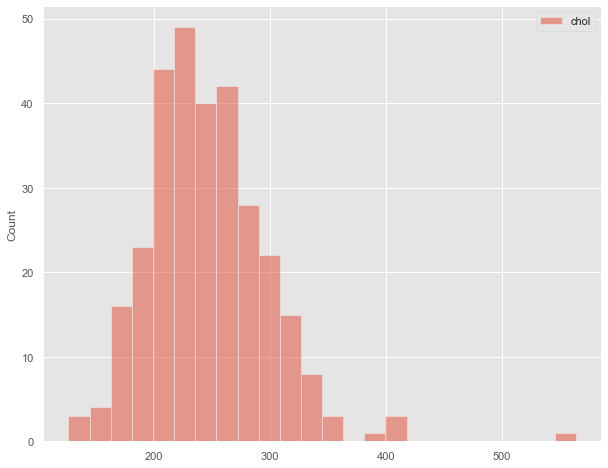

In [68]:
f,ax = plt.subplots(figsize=(10,8))
sns.histplot([data.chol])

In [69]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [70]:
x = data.drop(columns=['target'], axis=1)
z = data.drop(columns=['target'], axis=1)
y = data.target

In [71]:
num_val = ['age','trestbps','chol','thalach','oldpeak' ]
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [72]:
col_trans = ColumnTransformer( 
    [ 
        ('num', StandardScaler(), num_val),
        ('cat', OrdinalEncoder(), cat_val)
    ]
)

x = pd.DataFrame(col_trans.fit_transform(x))
x.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0,3.0,0.0,0.0,0.0,0.0,1.0


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [74]:
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

ac_scr = accuracy_score(y_test,y_pred)

mod_scr = pd.DataFrame( 
    [ 
        'LogisticRegression', ac_scr
    ]
).transpose()

mod_scr.columns = ['Method', 'Accuracy Score']

mod_scr

,Method,Accuracy Score
0,LogisticRegression,0.824176


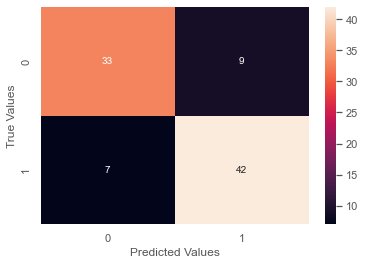

In [75]:
con_dic = {
    'y_test':y_test,
    'y_pred':y_pred
}
con_mat = pd.DataFrame( 
    con_dic, columns = ['y_test', 'y_pred']
)

confusion_matrix = pd.crosstab(con_mat['y_test'], con_mat['y_pred'], rownames=['True Values'], colnames=['Predicted Values'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'KNN Accuracy score'}>

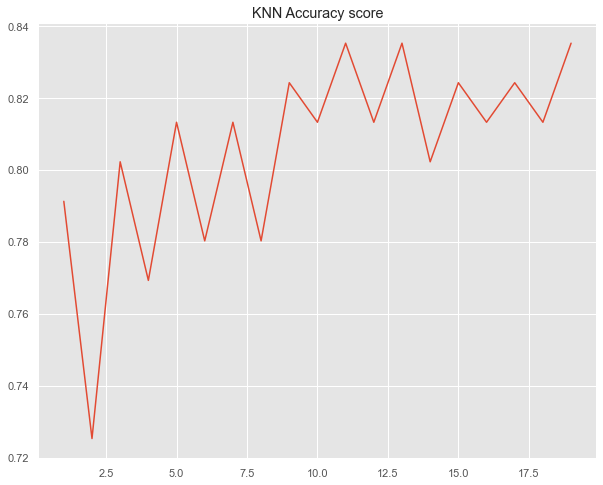

In [78]:
accuracies = []

for N in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    accuracies.append(accu)

accuracies = np.array(accuracies)

f,ax = plt.subplots(figsize=(10,8))
ax.set_title('KNN Accuracy score')
sns.lineplot(np.arange(1,20),accuracies)

In [79]:
k_best = 1 + np.argmax(accuracies)
best_accu = np.max(accuracies)

mod_pe = pd.DataFrame( 
    [ 
        k_best,best_accu
    ]
).transpose()

mod_pe.columns = [ 'k_best', 'best_accu']

mod_pe

,k_best,best_accu
0,11.0,0.835165
